# Data Files
- ./time_series_covid19_confirmed_HOU.csv - COVID-19 Confirmed Cases data(01/22 to 09/06) 
- ./time_series_covid19_death_HOU.csv - COVID-19 Deceased Cases data(01/22 to 09/06) 


- ./austin_hosp_0906.xlsx - Hospitalization Data at Austin County (06/01 to 09/06)
- ./brazoria_hosp_0906.xlsx - Hospitalization Data at Brazoria County (06/01 to 09/06)
- ./chambers_hosp_0906.xlsx - Hospitalization Data at Chambers County (06/01 to 09/06)
- ./fortbend_hosp_0906.xlsx - Hospitalization Data at Fortbend County (06/01 to 09/06)
- ./galveston_hosp_0906.xlsx - Hospitalization Data at Galveston County (06/01 to 09/06)
- ./harris_hosp_0906.xlsx - Hospitalization Data at Harris County (06/01 to 09/06)
- ./liberty_hosp_0906.xlsx - Hospitalization Data at Liberty County (06/01 to 09/06)
- ./montgomery_hosp_0906.xlsx - Hospitalization Data at Montgomery County (06/01 to 09/06)


- ./applemobilitytrends-2020-09-06.csv - Apple's Mobility Data(01/13 to 09/06) 


- ./mask_use_HOU.csv - COVID-19 Mask Usage Survey(Interviewed 07/02 to 07/14)


- ./Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx - COVID-19 Hospitalization data
- ./Texas Hospital Capacity over Time by TSA Region.xlsx - COVID-19 Hospitalization Capacity data


- ./UID_ISO_FIPS_LookUp_Table.csv - County FIPS and population data

## COVID-19 confirmed cases data
Confirmed cases data consists of accumulated confirmed cases at 9 counties in Greater Houston between 03/01/2020 and 08/15/2020. In addition, longitude, latitude, and FIPS are provided, which may serve as foreign keys to query mask survey data.

## COVID-19 deceased cases data
Deceased data consists of accumulated deceased cases at 9 counties in Greater Houston between 03/01/2020 and 08/15/2020. In addition, longitude, latitude, and FIPS are provided, which may serve as foreign keys to query mask survey data.

## COVID-19 mask usage survey
COVID-19 mask usage survey conducted by The New York Times to estimate the mask usage by county in the United States. Data comes from over 250,000 online interviews between 07/02/2020 and 07/14/2020. Specifically, each interview involves how often the participant wears a mask publicly when he or she expects to be within six feet of another person.

## COVID-19 Hospitalization data
The hospitalization data in TX includes incident rate, estimated active cases, testing number, and available hospitalization rate from CSSE. Some portion of the data is missing, such as estimated hospitalization and hospitalization rate after reopening (04/28/2020). But hospitalization and hospital capacity is available from TSA Region data.

## County FIPS and population data
FIPS data is used to check county code and population. It’s in a single csv file.

In [17]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
from sklearn.svm import SVR
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [18]:
# File Paths
import os

path_parent = os.getcwd()
print(path_parent)

confirmed_cases_path = os.path.join(path_parent, 'Data Files/time_series_covid19_confirmed_HOU.csv')
death_cases_path = os.path.join(path_parent, 'Data Files/time_series_covid19_death_HOU.csv')

hosp_austin_path = os.path.join(path_parent, 'Data Files/austin_hosp_0906.xlsx')
hosp_brazoria_path = os.path.join(path_parent, 'Data Files/brazoria_hosp_0906.xlsx')
hosp_chambers_path = os.path.join(path_parent, 'Data Files/chambers_hosp_0906.xlsx')
hosp_fortbend_path = os.path.join(path_parent, 'Data Files/fortbend_hosp_0906.xlsx')
hosp_galveston_path = os.path.join(path_parent, 'Data Files/galveston_hosp_0906.xlsx')
hosp_harris_path = os.path.join(path_parent, 'Data Files/harris_hosp_0906.xlsx')
hosp_liberty_path = os.path.join(path_parent, 'Data Files/liberty_hosp_0906.xlsx')
hosp_montgomery_path = os.path.join(path_parent, 'Data Files/montgomery_hosp_0906.xlsx')

apple_mobility_path = os.path.join(path_parent, 'Data Files/applemobilitytrends-2020-09-06.csv')
mask_usage_path = os.path.join(path_parent, 'Data Files/mask_use_HOU.csv')
fips_path = os.path.join(path_parent, 'Data Files/UID_ISO_FIPS_LookUp_Table.csv')

hosp_tx_xlsx_path = os.path.join(path_parent, 'Data Files/Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx')
hosp_capa_path = os.path.join(path_parent, 'Data Files/Texas Hospital Capacity over Time by TSA Region.xlsx')

/Users/irpan/Desktop/Coding/COVID Datathon


In [19]:
%%time
df_confirmed_cases = pd.read_csv(confirmed_cases_path) 
df_confirmed_cases = df_confirmed_cases.loc[(df_confirmed_cases['Admin2']!='Waller')]
df_confirmed_cases

CPU times: user 38.7 ms, sys: 6.8 ms, total: 45.5 ms
Wall time: 55.3 ms


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,401,413,417,417,418,419,419,434,440,441
1,84048039,US,USA,840,48039.0,Brazoria,Texas,US,29.187574,-95.445632,...,9093,9220,9309,9389,9419,9592,9591,9670,9642,9817
2,84048071,US,USA,840,48071.0,Chambers,Texas,US,29.709720,-94.671545,...,1123,1123,1123,1123,1149,1155,1166,1166,1166,1166
3,84048157,US,USA,840,48157.0,Fort Bend,Texas,US,29.527045,-95.772195,...,14845,14933,14933,14957,14983,15036,15081,15100,15144,15144
4,84048167,US,USA,840,48167.0,Galveston,Texas,US,29.401673,-94.904691,...,10509,10543,10543,10575,10613,10646,10715,10780,10808,10808
5,84048201,US,USA,840,48201.0,Harris,Texas,US,29.858649,-95.393395,...,103088,104649,105757,106595,107490,108085,108819,109834,110762,111525
6,84048291,US,USA,840,48291.0,Liberty,Texas,US,30.151527,-94.812056,...,1670,1786,1826,1826,1829,1835,1860,1843,1879,1881
7,84048339,US,USA,840,48339.0,Montgomery,Texas,US,30.300791,-95.505728,...,8580,8580,8580,8736,8800,8904,9046,9164,9164,9164


In [20]:
%%time
df_death_cases = pd.read_csv(death_cases_path)
df_death_cases = df_death_cases.loc[df_death_cases['Admin2']!='Waller']
df_death_cases

CPU times: user 33.5 ms, sys: 4.36 ms, total: 37.8 ms
Wall time: 34.5 ms


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,6,6,6,6,6,6,6,6,6,6
1,84048039,US,USA,840,48039.0,Brazoria,Texas,US,29.187574,-95.445632,...,134,137,138,138,138,139,143,145,146,146
2,84048071,US,USA,840,48071.0,Chambers,Texas,US,29.709720,-94.671545,...,5,5,5,5,5,5,5,5,5,5
3,84048157,US,USA,840,48157.0,Fort Bend,Texas,US,29.527045,-95.772195,...,231,231,234,237,239,240,243,244,247,247
4,84048167,US,USA,840,48167.0,Galveston,Texas,US,29.401673,-94.904691,...,137,137,140,140,140,142,143,143,144,144
5,84048201,US,USA,840,48201.0,Harris,Texas,US,29.858649,-95.393395,...,2153,2177,2188,2192,2208,2247,2281,2300,2327,2335
6,84048291,US,USA,840,48291.0,Liberty,Texas,US,30.151527,-94.812056,...,42,43,43,43,43,43,43,44,46,46
7,84048339,US,USA,840,48339.0,Montgomery,Texas,US,30.300791,-95.505728,...,120,120,120,122,125,130,132,132,133,133


In [21]:
# drop useless cols
df_confirmed_cases_processed = df_confirmed_cases
df_confirmed_cases_processed = df_confirmed_cases_processed.drop(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_confirmed_cases_processed

,FIPS,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,401,413,417,417,418,419,419,434,440,441
1,48039.0,Brazoria,0,0,0,0,0,0,0,0,...,9093,9220,9309,9389,9419,9592,9591,9670,9642,9817
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,1123,1123,1123,1123,1149,1155,1166,1166,1166,1166
3,48157.0,Fort Bend,0,0,0,0,0,0,0,0,...,14845,14933,14933,14957,14983,15036,15081,15100,15144,15144
4,48167.0,Galveston,0,0,0,0,0,0,0,0,...,10509,10543,10543,10575,10613,10646,10715,10780,10808,10808
5,48201.0,Harris,0,0,0,0,0,0,0,0,...,103088,104649,105757,106595,107490,108085,108819,109834,110762,111525
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,1670,1786,1826,1826,1829,1835,1860,1843,1879,1881
7,48339.0,Montgomery,0,0,0,0,0,0,0,0,...,8580,8580,8580,8736,8800,8904,9046,9164,9164,9164


In [22]:
# drop useless cols
df_death_cases_processed = df_death_cases
df_death_cases_processed = df_death_cases_processed.drop(['Population','UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_death_cases_processed

,FIPS,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,48039.0,Brazoria,0,0,0,0,0,0,0,0,...,134,137,138,138,138,139,143,145,146,146
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
3,48157.0,Fort Bend,0,0,0,0,0,0,0,0,...,231,231,234,237,239,240,243,244,247,247
4,48167.0,Galveston,0,0,0,0,0,0,0,0,...,137,137,140,140,140,142,143,143,144,144
5,48201.0,Harris,0,0,0,0,0,0,0,0,...,2153,2177,2188,2192,2208,2247,2281,2300,2327,2335
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,42,43,43,43,43,43,43,44,46,46
7,48339.0,Montgomery,0,0,0,0,0,0,0,0,...,120,120,120,122,125,130,132,132,133,133


In [23]:
for null_count in df_confirmed_cases_processed.isnull().sum():
    if null_count > 0:
        print(null_count)
        
for null_count in df_death_cases_processed.isnull().sum():
    if null_count > 0:
        print(null_count)

In [24]:
%%time
df_mask_usage = pd.read_csv(mask_usage_path)
df_mask_usage = df_mask_usage.loc[df_mask_usage['COUNTYFP'] != 48473]
df_mask_usage

CPU times: user 6.78 ms, sys: 1.1 ms, total: 7.88 ms
Wall time: 7.06 ms


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48015,0.006,0.024,0.054,0.224,0.692
1,48039,0.021,0.042,0.075,0.170,0.691
2,48071,0.027,0.094,0.078,0.201,0.600
3,48157,0.024,0.030,0.057,0.115,0.774
4,48167,0.033,0.037,0.105,0.207,0.617
5,48201,0.019,0.024,0.069,0.152,0.736
6,48291,0.019,0.034,0.114,0.182,0.650
7,48339,0.031,0.073,0.061,0.145,0.690


In [25]:
%%time
df_fips = pd.read_csv(fips_path)

fips_lst = []
for fips in df_confirmed_cases['FIPS']:
    fips_lst.append(fips)

df_fips = df_fips.loc[df_fips['FIPS'].isin(fips_lst)]   

land_area = {'Austin': 646.5,
 'Brazoria': 1357.7,
 'Chambers': 597.1,
 'Fort Bend': 861.5,
 'Galveston': 378.4,
 'Harris': 1703.5,
 'Liberty': 1158.4,
 'Montgomery': 1041.7}

df_fips['Land Area'] = list(land_area.values())

pop_density = []
for i in range(len(df_fips['Population'])):
    pop = list(df_fips['Population'])[i]
    area = list(df_fips['Land Area'])[i]
    pop_density.append(pop/area)

df_fips['Population Density'] =  pop_density

# scales the population density from 0 to 1 
min_max_scaler = MinMaxScaler()
df_fips['Population Density Scaled'] =  min_max_scaler.fit_transform(np.array(pop_density).reshape(-1, 1))

df_population = df_fips.drop(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_population


CPU times: user 20.8 ms, sys: 3.62 ms, total: 24.4 ms
Wall time: 37.4 ms


,FIPS,Admin2,Population,Land Area,Population Density,Population Density Scaled
3541,48015.0,Austin,30032.0,646.5,46.453210,0.000000
3553,48039.0,Brazoria,374264.0,1357.7,275.660308,0.084255
3569,48071.0,Chambers,43837.0,597.1,73.416513,0.009912
3612,48157.0,Fort Bend,811688.0,861.5,942.179919,0.329264
3617,48167.0,Galveston,342139.0,378.4,904.172833,0.315292
3634,48201.0,Harris,4713325.0,1703.5,2766.847667,1.000000
3679,48291.0,Liberty,88219.0,1158.4,76.155905,0.010919
3703,48339.0,Montgomery,607391.0,1041.7,583.076702,0.197259


In [26]:
county_lst = []
for county in df_confirmed_cases['Admin2']:
    county_lst.append(str(county)+' County')
county_lst

['Austin County',
 'Brazoria County',
 'Chambers County',
 'Fort Bend County',
 'Galveston County',
 'Harris County',
 'Liberty County',
 'Montgomery County']

In [27]:
df_hosp_austin =  pd.read_excel(hosp_austin_path)
df_hosp_brazoria =  pd.read_excel(hosp_brazoria_path)
df_hosp_chambers =  pd.read_excel(hosp_chambers_path)
df_hosp_fortbend =  pd.read_excel(hosp_fortbend_path)
df_hosp_galveston =  pd.read_excel(hosp_galveston_path)
df_hosp_harris =  pd.read_excel(hosp_harris_path)
df_hosp_liberty =  pd.read_excel(hosp_liberty_path)
df_hosp_montgomery =  pd.read_excel(hosp_montgomery_path)

In [28]:
## consistent date format

# cases dfs
new_cases_col = list(df_confirmed_cases_processed.columns[:2])
for date in df_confirmed_cases_processed.columns[2:]:
    new_date = datetime.datetime.strptime(date, '%m/%d/%y').strftime('%Y%m%d')
    new_cases_col.append(new_date)

df_confirmed_cases_processed.columns = new_cases_col
df_death_cases_processed.columns = new_cases_col

# hosp dfs
def change_date_format_1(df_hosp):
    new_hosp_dates = []
    for date in df_hosp.astype({'Date': 'string'})['Date']:
        new_date = datetime.datetime.strptime(str(date), '%Y-%m-%d').strftime('%Y%m%d')
        new_hosp_dates.append(new_date)

    df_hosp['Date'] = new_hosp_dates
    
def change_date_format_2(df_hosp):
    new_hosp_dates = []
    for date in df_hosp.astype({'Date': 'string'})['Date']:
        new_date = datetime.datetime.strptime(str(date), '%m/%d/%y').strftime('%Y%m%d')
        new_hosp_dates.append(new_date)

    df_hosp['Date'] = new_hosp_dates

    
change_date_format_1(df_hosp_austin)
change_date_format_1(df_hosp_chambers)
change_date_format_1(df_hosp_fortbend)
change_date_format_1(df_hosp_liberty)
change_date_format_1(df_hosp_montgomery)
change_date_format_1(df_hosp_brazoria)
change_date_format_1(df_hosp_galveston)
change_date_format_1(df_hosp_harris)

In [30]:
# start from 20200401
dates_starting_april = list(df_hosp_austin['Date'])
days_since_april = [i for i in range(len(dates_starting_april))]

# drop dates before 20200401 in dfs
df_confirmed_cases_processed = df_confirmed_cases_processed[list(df_confirmed_cases_processed.columns[:2]) + dates_starting_april]
df_death_cases_processed = df_death_cases_processed[list(df_death_cases_processed.columns[:2]) + dates_starting_april]
#df_apple_mobility = df_apple_mobility[list(df_apple_mobility.columns[:2]) + dates_starting_april]

# predict 7 days
days_next = 7
future_days = [i for i in range(len(dates_starting_april) + days_next)]

In [31]:
# Reshape our arays for sklearn
days_since_april = np.array(days_since_april).reshape(-1, 1)
future_days = np.array(future_days).reshape(-1, 1)

In [32]:
df_confirmed_cases_processed

,FIPS,Admin2,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,...,20200828,20200829,20200830,20200831,20200901,20200902,20200903,20200904,20200905,20200906
0,48015.0,Austin,2,4,4,4,5,5,6,7,...,401,413,417,417,418,419,419,434,440,441
1,48039.0,Brazoria,95,109,123,144,144,167,173,173,...,9093,9220,9309,9389,9419,9592,9591,9670,9642,9817
2,48071.0,Chambers,9,9,11,11,11,11,17,19,...,1123,1123,1123,1123,1149,1155,1166,1166,1166,1166
3,48157.0,Fort Bend,163,194,221,255,268,318,318,417,...,14845,14933,14933,14957,14983,15036,15081,15100,15144,15144
4,48167.0,Galveston,106,118,130,136,240,256,256,272,...,10509,10543,10543,10575,10613,10646,10715,10780,10808,10808
5,48201.0,Harris,847,955,1106,1284,1395,1809,2146,2341,...,103088,104649,105757,106595,107490,108085,108819,109834,110762,111525
6,48291.0,Liberty,3,3,5,5,6,6,12,15,...,1670,1786,1826,1826,1829,1835,1860,1843,1879,1881
7,48339.0,Montgomery,110,119,130,142,149,161,197,210,...,8580,8580,8580,8736,8800,8904,9046,9164,9164,9164


In [33]:
df_death_cases_processed

,FIPS,Admin2,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,...,20200828,20200829,20200830,20200831,20200901,20200902,20200903,20200904,20200905,20200906
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,48039.0,Brazoria,1,1,1,1,1,1,1,1,...,134,137,138,138,138,139,143,145,146,146
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
3,48157.0,Fort Bend,2,2,2,2,5,6,6,6,...,231,231,234,237,239,240,243,244,247,247
4,48167.0,Galveston,0,0,0,0,1,1,1,5,...,137,137,140,140,140,142,143,143,144,144
5,48201.0,Harris,25,29,31,36,47,54,58,63,...,2153,2177,2188,2192,2208,2247,2281,2300,2327,2335
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,42,43,43,43,43,43,43,44,46,46
7,48339.0,Montgomery,2,3,3,3,3,3,4,4,...,120,120,120,122,125,130,132,132,133,133


In [34]:
def death_prediction_svr_cum(county_row_idx, kernel):
    county = df_death_cases_processed['Admin2'][county_row_idx]
    
    X = np.array(days_since_april).reshape(-1, 1)
    y = np.array(df_death_cases_processed.iloc[county_row_idx, 2:]).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    

    regressor = SVR(kernel)
    regressor.fit(X_train,y_train)
    
#     predictions = regressor.predict(X_test)
#     if predictions[0] < y_test[0]
#     for i in range(len(predictions)):
#         if (predictions[i] < X_train[-1])
    
    plt.figure(figsize=(12,8))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'green')
    #plt.plot(X_test, regressor.predict(X_test), color = 'green')
    plt.title(str(county) + ' County Death Count(SVR, ' + kernel +')')
    plt.xlabel('Days since April 1st')
    plt.ylabel('Death count')
    plt.show()

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


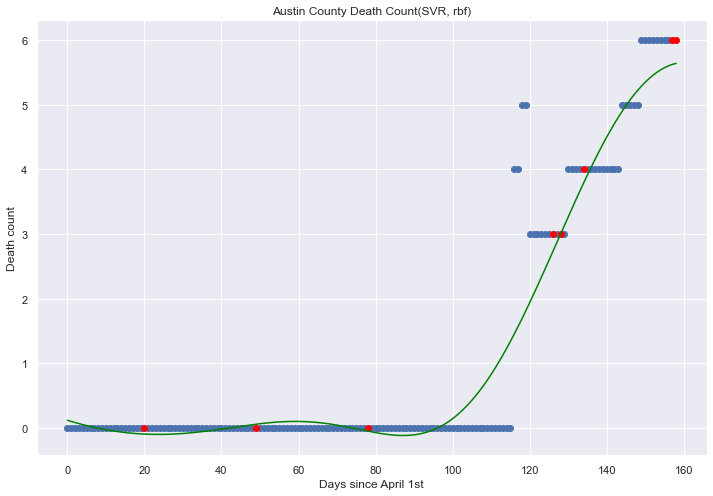

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


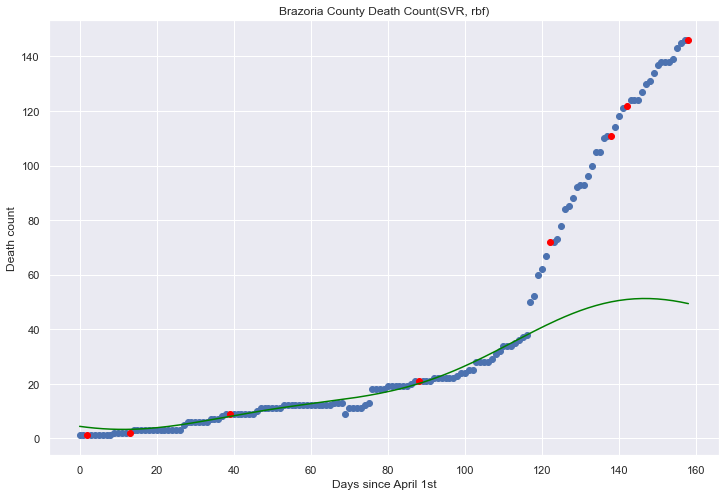

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


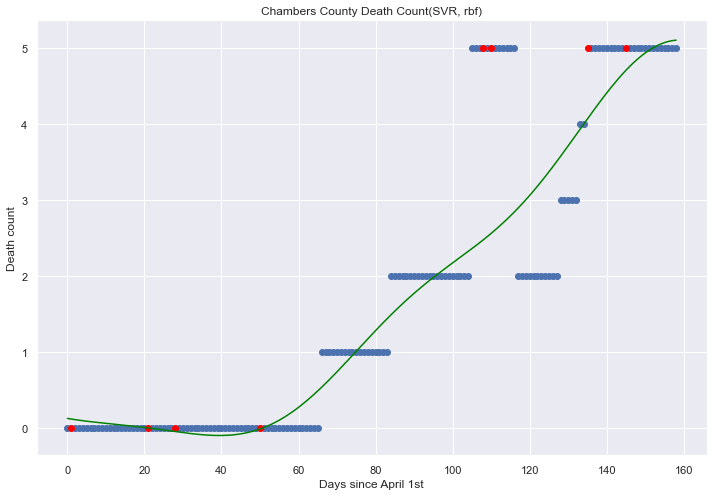

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


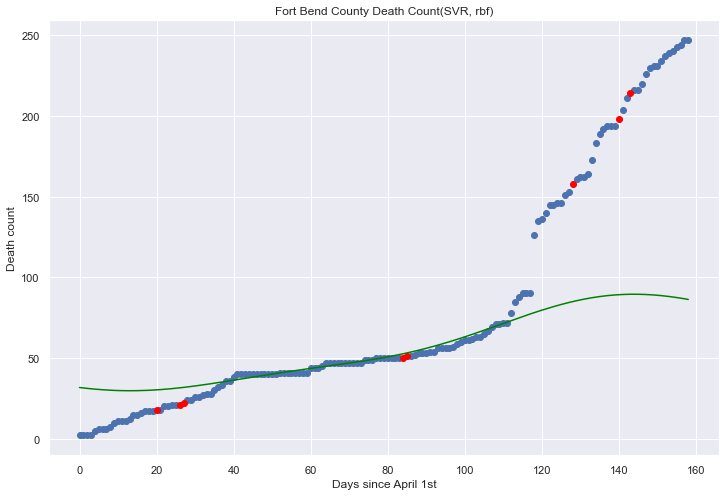

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


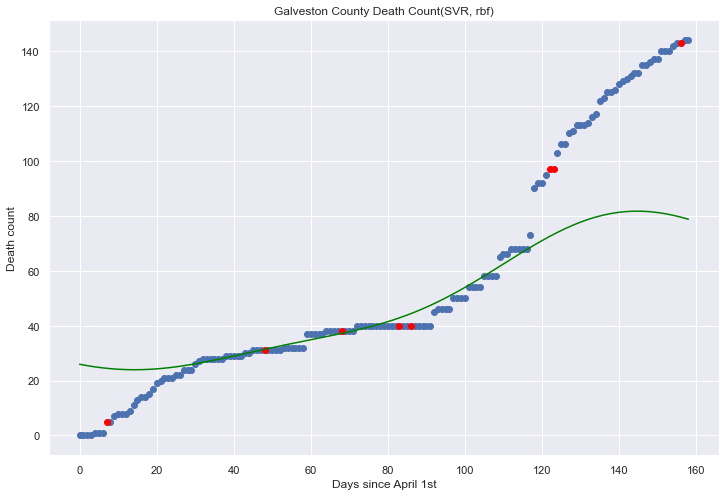

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


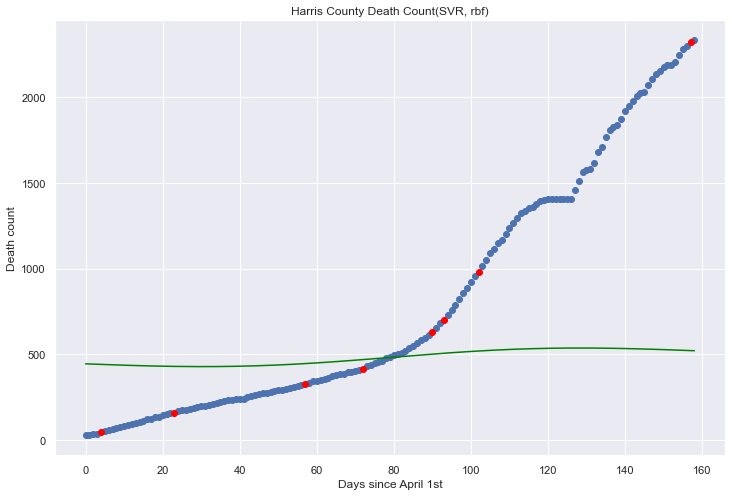

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


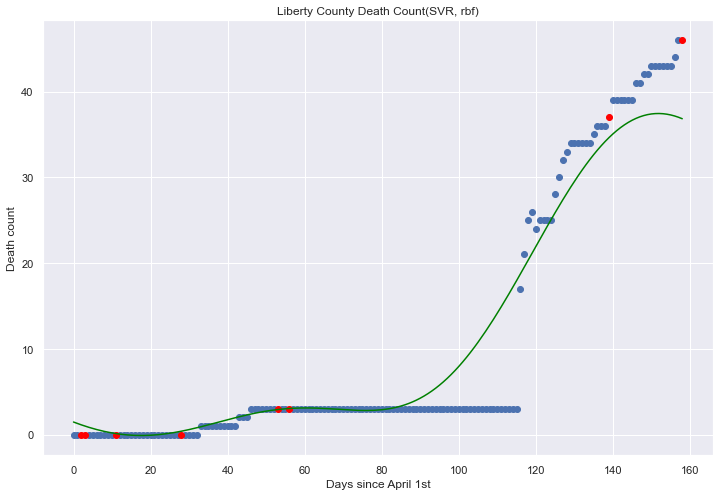

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


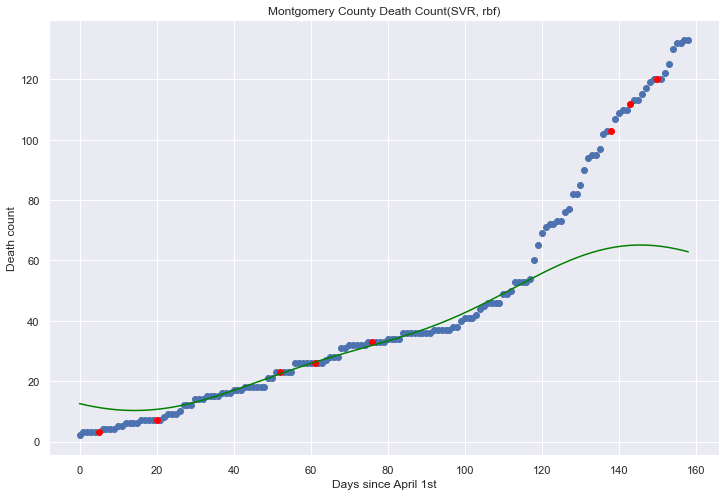

In [35]:
for county_row_idx in range(8):
    death_prediction_svr_cum(county_row_idx, kernel = 'rbf')

In [36]:
def death_cum_to_count(county_row_idx):
    death_count_cum = list(df_death_cases_processed.iloc[county_row_idx, 2:])
    death_count = [death_count_cum[0]]
    for i in range(1, len(death_count_cum)):
        count = death_count_cum[i] - death_count_cum[i-1]
        if count >= 0: 
            death_count.append(count)
        else:
            death_count.append(0)

    return death_count

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


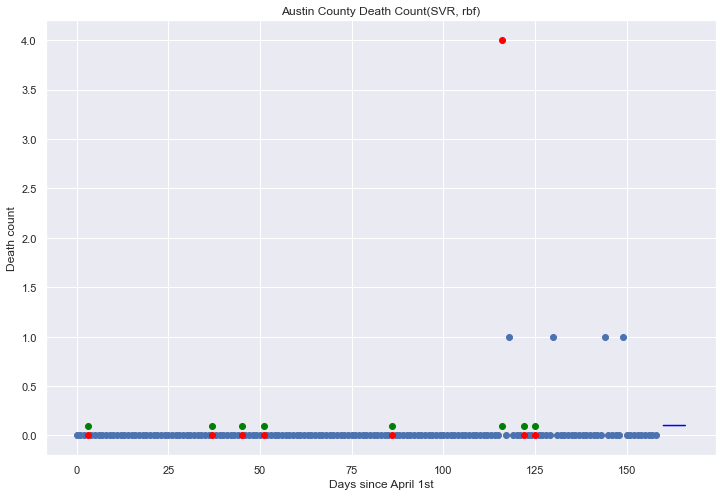

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


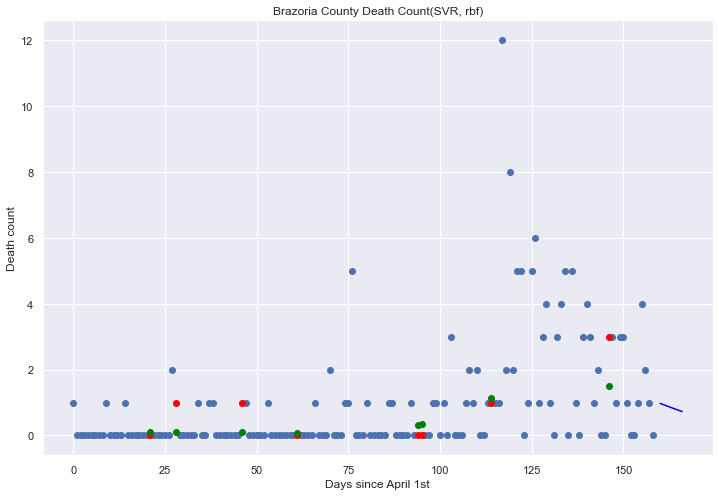

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


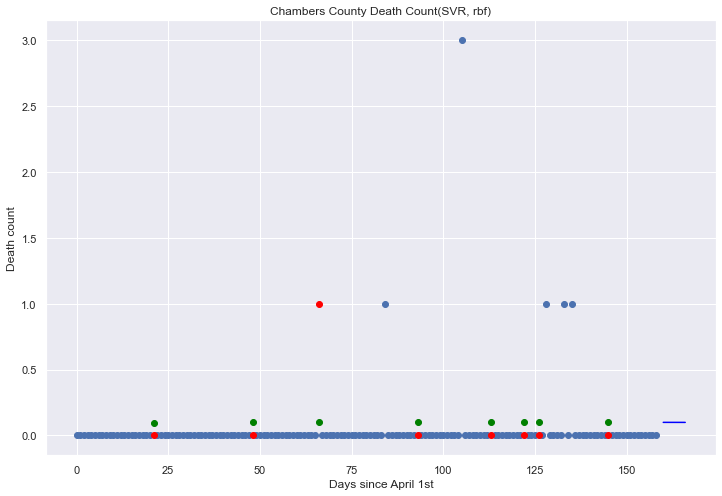

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


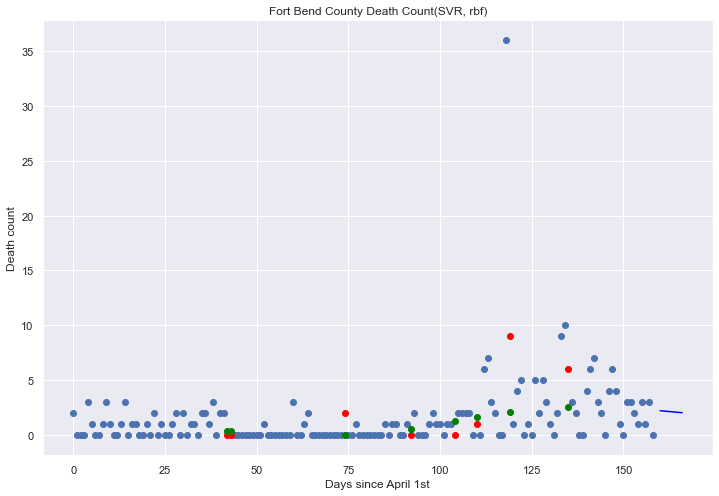

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


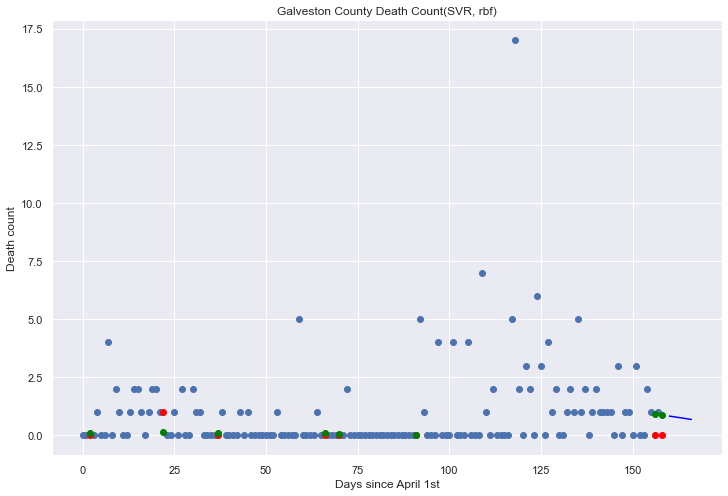

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


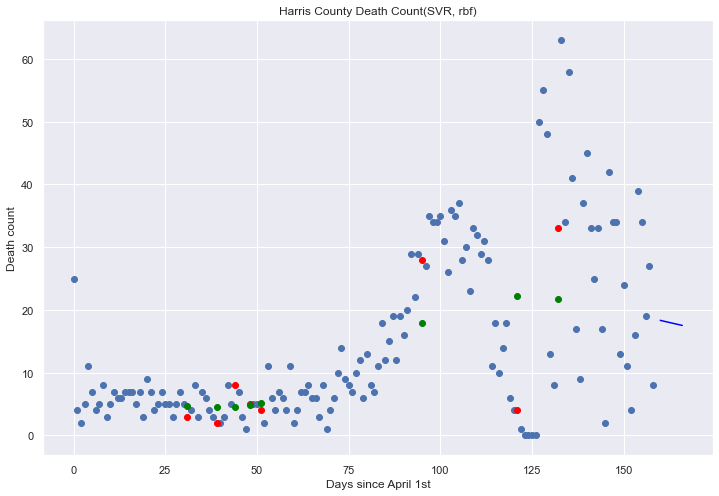

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


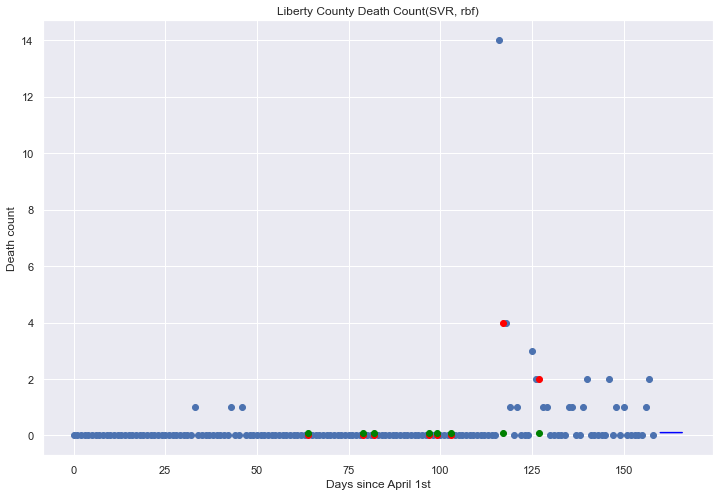

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


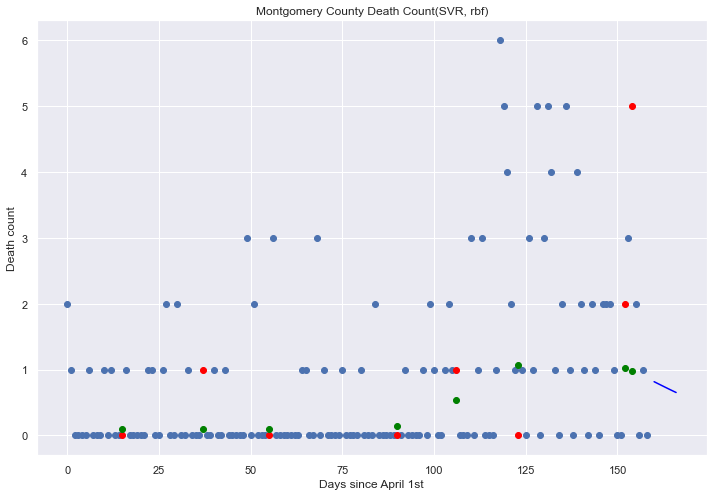

{'Austin': array([0.10062719, 0.10065301, 0.10067666, 0.10069805, 0.1007171 ,
        0.10073377, 0.100748  ]),
 'Brazoria': array([0.97321887, 0.931084  , 0.88921433, 0.84774273, 0.80679611,
        0.76649494, 0.72695285]),
 'Chambers': array([0.09965068, 0.09960727, 0.09956313, 0.09951835, 0.09947303,
        0.09942725, 0.09938113]),
 'Fort Bend': array([2.2129841 , 2.18371297, 2.15396407, 2.12382092, 2.09336528,
        2.062677  , 2.03183373]),
 'Galveston': array([0.8334648 , 0.81019308, 0.78655444, 0.76264575, 0.73856165,
        0.71439403, 0.69023167]),
 'Harris': array([18.34859305, 18.21191285, 18.07597   , 17.9408722 , 17.80672196,
        17.6736169 , 17.5416501 ]),
 'Liberty': array([0.10130053, 0.10144322, 0.10159097, 0.10174297, 0.10189836,
        0.10205626, 0.10221579]),
 'Montgomery': array([0.81636341, 0.78850421, 0.76073536, 0.73314844, 0.70583089,
        0.67886573, 0.65233122])}

In [37]:
mortality_count_dict = {}
for county_row_idx in range(8):
    county = df_death_cases_processed['Admin2'][county_row_idx]
    
    X = np.array(days_since_april).reshape(-1, 1)
    y = np.array(death_cum_to_count(county_row_idx)).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    
    kernel = 'rbf'
    regressor = SVR(kernel)
    regressor.fit(X_train, y_train)
    
    # predict next 09/07 - 09/13  
    prediction = regressor.predict(X[-7:] + 8)
    mortality_count_dict[county] = prediction
    
    plt.figure(figsize=(12,8))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color = 'red')
    plt.scatter(X_test, regressor.predict(X_test), color = 'green')
    plt.plot((X[-7:] + 8), prediction, color = 'blue')
    plt.title(str(county) + ' County Death Count(SVR, ' + kernel +')')
    plt.xlabel('Days since April 1st')
    plt.ylabel('Death count')
    plt.show()


mortality_count_dict    

In [38]:
covid_bed_list = [list(df_hosp_austin['CovidBed']), list(df_hosp_brazoria['CovidBed']), 
list(df_hosp_chambers['CovidBed']), list(df_hosp_fortbend['CovidBed']), 
list(df_hosp_galveston['CovidBed']), list(df_hosp_harris['CovidBed']), 
list(df_hosp_liberty['CovidBed']), list(df_hosp_montgomery['CovidBed'])]

icu_covid_bed_list = [list(df_hosp_austin['ICUCovidBed']), list(df_hosp_brazoria['ICUCovidBed']), 
list(df_hosp_chambers['ICUCovidBed']), list(df_hosp_fortbend['ICUCovidBed']), 
list(df_hosp_galveston['ICUCovidBed']), list(df_hosp_harris['ICUCovidBed']), 
list(df_hosp_liberty['ICUCovidBed']), list(df_hosp_montgomery['ICUCovidBed'])]

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


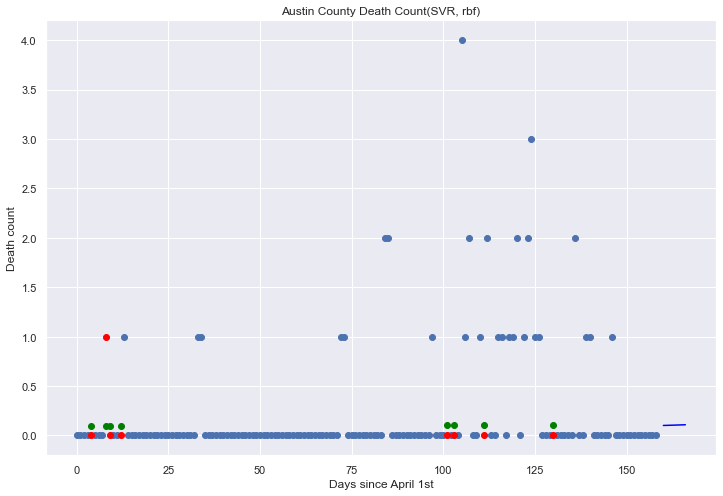

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


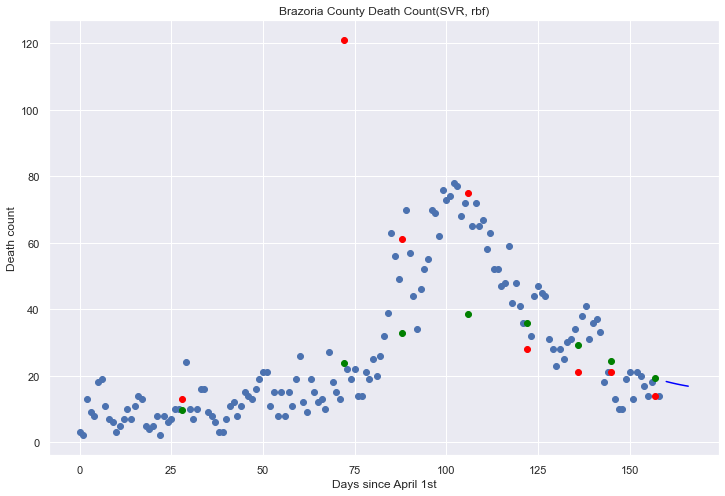

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


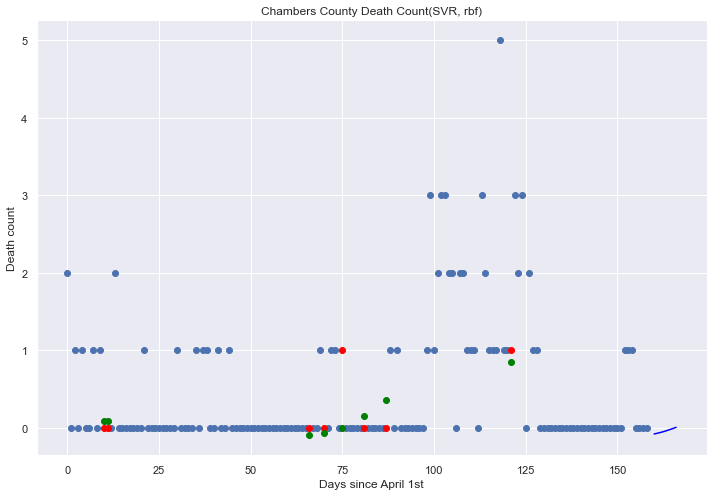

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


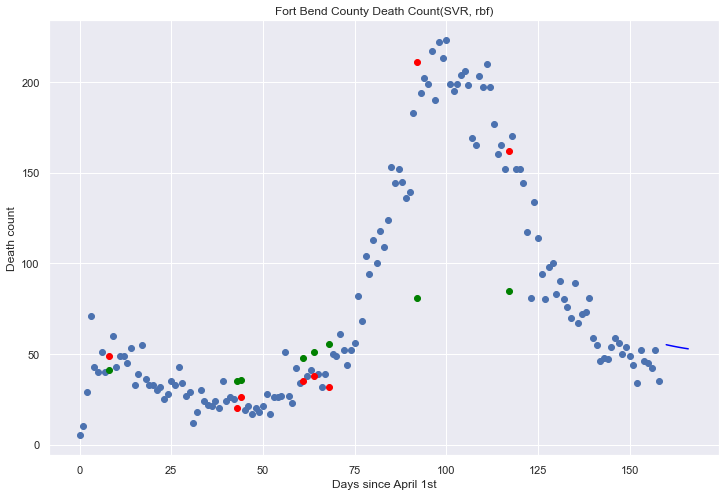

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


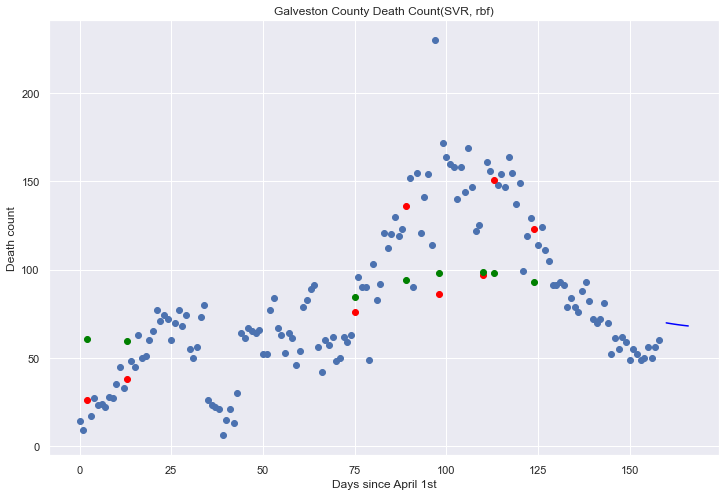

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


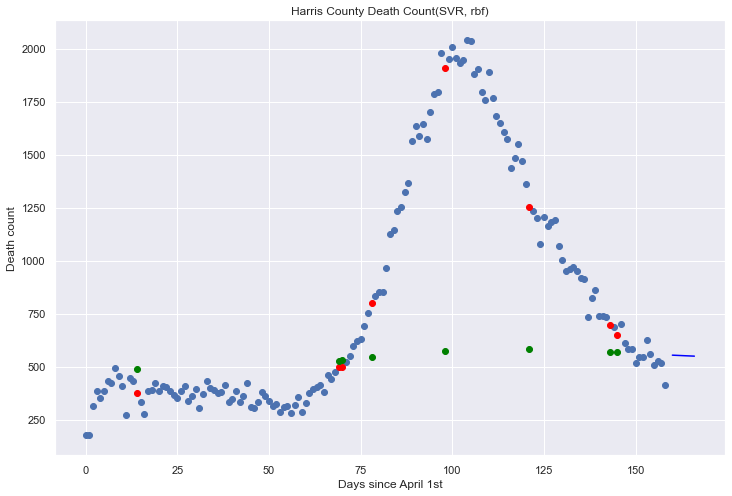

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


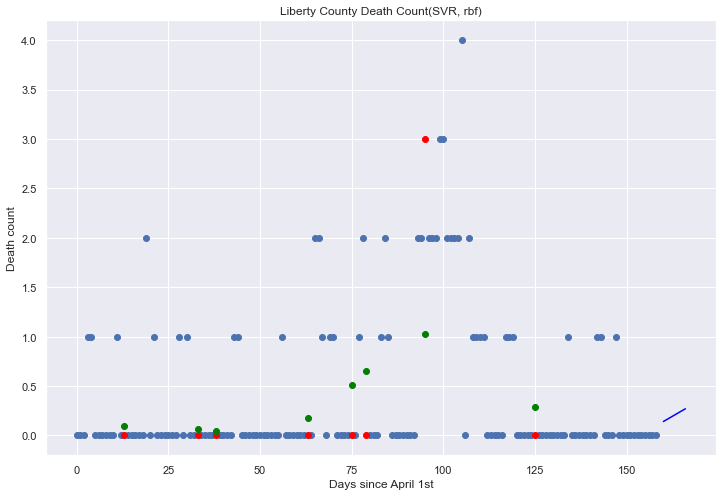

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


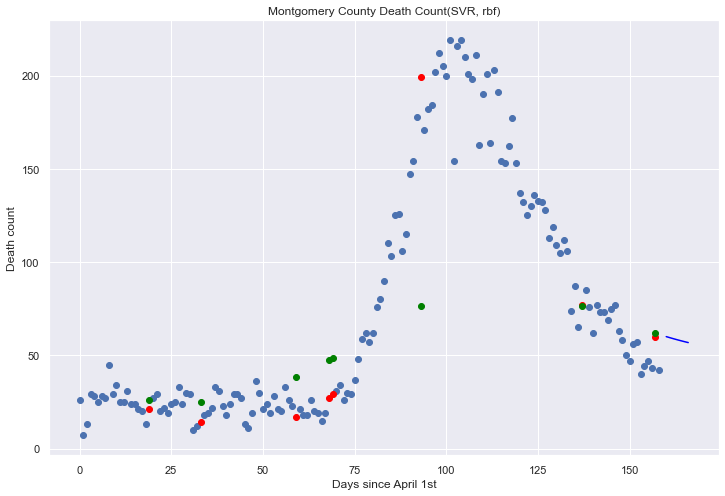

{'Austin': array([0.10151758, 0.10256976, 0.1036813 , 0.10484538, 0.10605489,
        0.10730243, 0.10858042]),
 'Brazoria': array([18.24893872, 17.97012073, 17.7090032 , 17.46555474, 17.23968706,
        17.03125732, 16.8400708 ]),
 'Chambers': array([-0.07707542, -0.0665787 , -0.05441162, -0.04069126, -0.02553992,
        -0.00908412,  0.00854636]),
 'Fort Bend': array([55.05582702, 54.61457175, 54.19870131, 53.8081986 , 53.44296866,
        53.10284169, 52.78757639]),
 'Galveston': array([69.81049954, 69.45937431, 69.13251455, 68.82981422, 68.55109391,
        68.296104  , 68.06452799]),
 'Harris': array([553.94403767, 553.13515503, 552.33848579, 551.55486269,
        550.78506014, 550.029794  , 549.28972145]),
 'Liberty': array([0.14136195, 0.16270472, 0.18424332, 0.20586272, 0.22745216,
        0.24890564, 0.27012236]),
 'Montgomery': array([60.01976099, 59.436917  , 58.87344209, 58.32973782, 57.80613065,
        57.30287363, 56.82014835])}

In [39]:
covid_bed_count_dict = {}
for county_row_idx in range(8):
    county = df_death_cases_processed['Admin2'][county_row_idx]
    
    X = np.array(days_since_april).reshape(-1, 1)
    y = np.array(covid_bed_list[county_row_idx]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    
    kernel = 'rbf'
    regressor = SVR(kernel)
    regressor.fit(X_train, y_train)
    
    # predict next 09/07 - 09/13  
    prediction = regressor.predict(X[-7:] + 8)
    covid_bed_count_dict[county] = prediction
    
    plt.figure(figsize=(12,8))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color = 'red')
    plt.scatter(X_test, regressor.predict(X_test), color = 'green')
    plt.plot((X[-7:] + 8), prediction, color = 'blue')
    plt.title(str(county) + ' County Death Count(SVR, ' + kernel +')')
    plt.xlabel('Days since April 1st')
    plt.ylabel('Death count')
    plt.show()

covid_bed_count_dict    

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


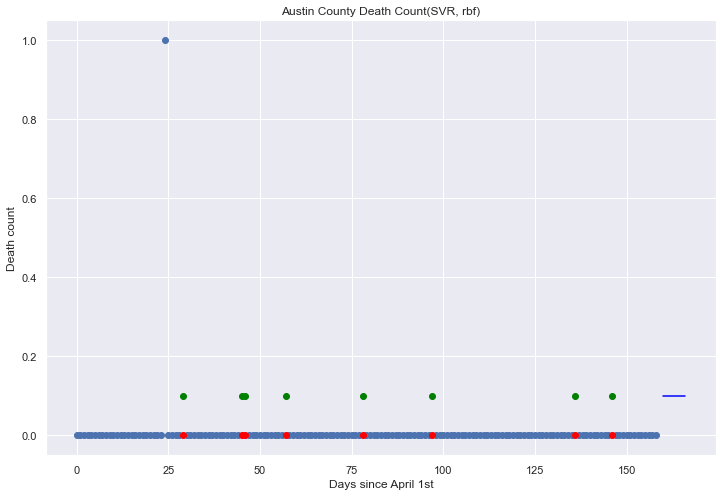

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


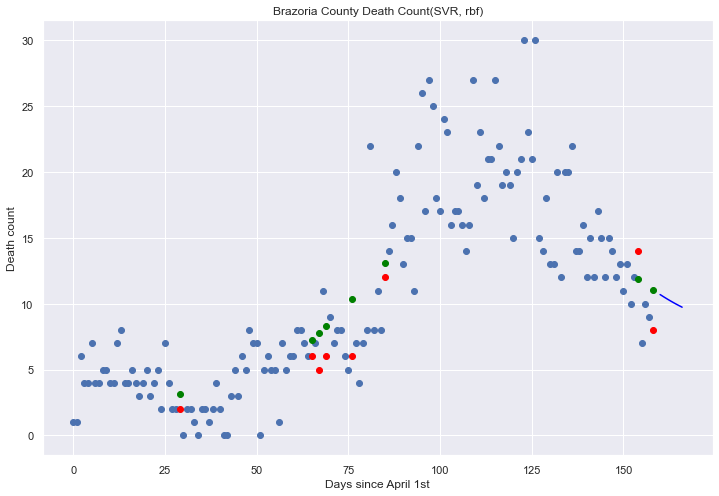

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


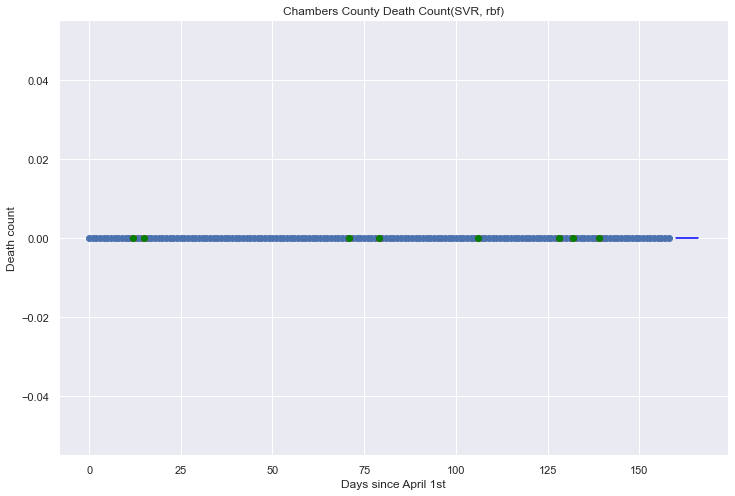

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


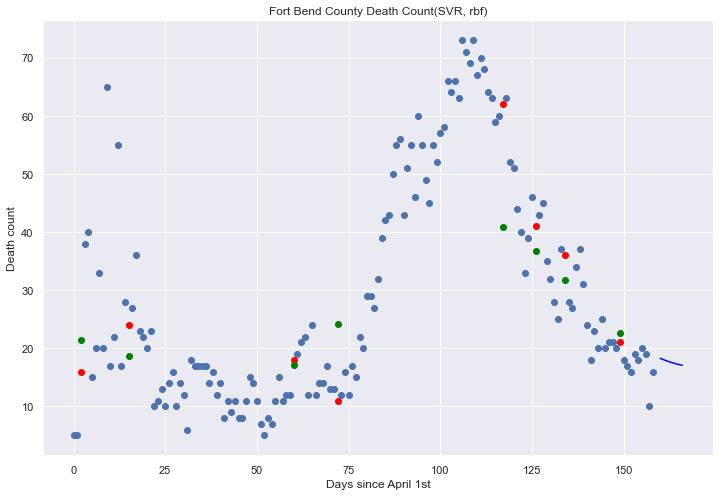

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


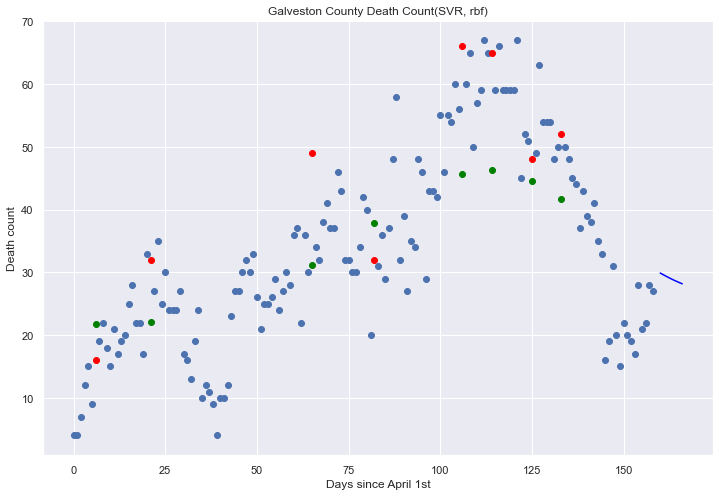

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


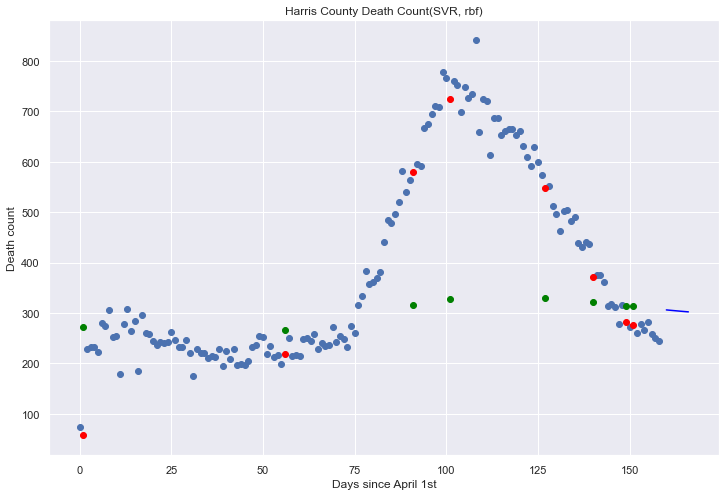

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


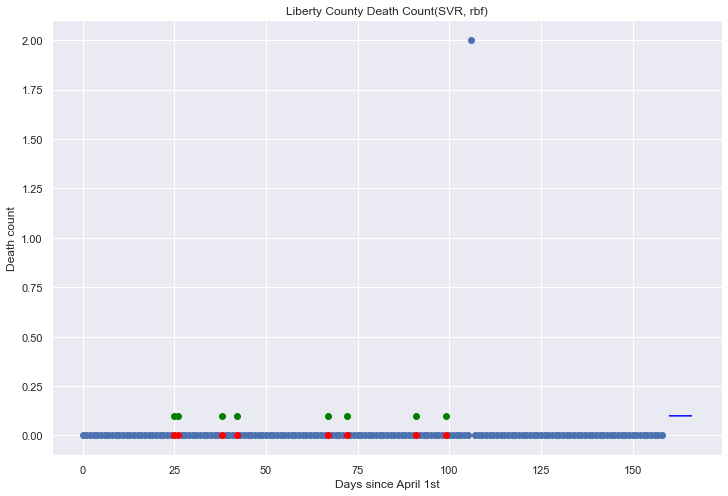

/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


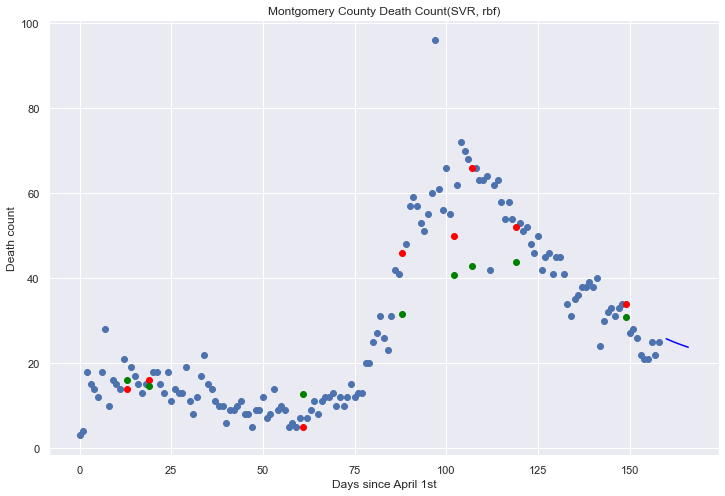

{'Austin': array([0.09953005, 0.09953019, 0.09953032, 0.09953043, 0.09953053,
        0.09953062, 0.09953071]),
 'Brazoria': array([10.69427844, 10.51727291, 10.34693053, 10.18341582, 10.02686492,
         9.87738606,  9.73506011]),
 'Chambers': array([0., 0., 0., 0., 0., 0., 0.]),
 'Fort Bend': array([18.27115648, 18.0143382 , 17.78037984, 17.56905916, 17.3800838 ,
        17.21309512, 17.0676721 ]),
 'Galveston': array([29.88859425, 29.56323141, 29.25311167, 28.95855011, 28.6797983 ,
        28.4170451 , 28.17041775]),
 'Harris': array([306.04199427, 305.34654724, 304.66853263, 304.00859056,
        303.36728569, 302.74510806, 302.14247428]),
 'Liberty': array([0.0993318 , 0.09933037, 0.09932956, 0.09932936, 0.09932973,
        0.09933064, 0.09933206]),
 'Montgomery': array([25.75731091, 25.38385197, 25.02655283, 24.68564489, 24.36129596,
        24.0536121 , 23.76263972])}

In [40]:
icu_covid_bed_count_dict = {}
for county_row_idx in range(8):
    county = df_death_cases_processed['Admin2'][county_row_idx]
    
    X = np.array(days_since_april).reshape(-1, 1)
    y = np.array(icu_covid_bed_list[county_row_idx]).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    
    kernel = 'rbf'
    regressor = SVR(kernel)
    regressor.fit(X_train, y_train)
    
    # predict next 09/07 - 09/13  
    prediction = regressor.predict(X[-7:] + 8)
    icu_covid_bed_count_dict[county] = prediction
    
    plt.figure(figsize=(12,8))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color = 'red')
    plt.scatter(X_test, regressor.predict(X_test), color = 'green')
    plt.plot((X[-7:] + 8), prediction, color = 'blue')
    plt.title(str(county) + ' County Death Count(SVR, ' + kernel +')')
    plt.xlabel('Days since April 1st')
    plt.ylabel('Death count')
    plt.show()
    
icu_covid_bed_count_dict

In [41]:
total_covid_bed = {}
for county in covid_bed_count_dict:
    total_covid_bed[county] = covid_bed_count_dict[county] + icu_covid_bed_count_dict[county]

total_covid_bed

{'Austin': array([0.20104764, 0.20209996, 0.20321162, 0.20437582, 0.20558542,
        0.20683305, 0.20811112]),
 'Brazoria': array([28.94321717, 28.48739364, 28.05593373, 27.64897057, 27.26655198,
        26.90864338, 26.5751309 ]),
 'Chambers': array([-0.07707542, -0.0665787 , -0.05441162, -0.04069126, -0.02553992,
        -0.00908412,  0.00854636]),
 'Fort Bend': array([73.3269835 , 72.62890995, 71.97908115, 71.37725776, 70.82305246,
        70.31593681, 69.85524848]),
 'Galveston': array([99.69909379, 99.02260573, 98.38562623, 97.78836433, 97.23089221,
        96.71314911, 96.23494574]),
 'Harris': array([859.98603194, 858.48170226, 857.00701842, 855.56345325,
        854.15234583, 852.77490206, 851.43219573]),
 'Liberty': array([0.24069375, 0.26203509, 0.28357288, 0.30519208, 0.3267819 ,
        0.34823628, 0.36945442]),
 'Montgomery': array([85.7770719 , 84.82076898, 83.89999492, 83.01538271, 82.16742661,
        81.35648573, 80.58278807])}

In [42]:
mortality_count_dict

{'Austin': array([0.10062719, 0.10065301, 0.10067666, 0.10069805, 0.1007171 ,
        0.10073377, 0.100748  ]),
 'Brazoria': array([0.97321887, 0.931084  , 0.88921433, 0.84774273, 0.80679611,
        0.76649494, 0.72695285]),
 'Chambers': array([0.09965068, 0.09960727, 0.09956313, 0.09951835, 0.09947303,
        0.09942725, 0.09938113]),
 'Fort Bend': array([2.2129841 , 2.18371297, 2.15396407, 2.12382092, 2.09336528,
        2.062677  , 2.03183373]),
 'Galveston': array([0.8334648 , 0.81019308, 0.78655444, 0.76264575, 0.73856165,
        0.71439403, 0.69023167]),
 'Harris': array([18.34859305, 18.21191285, 18.07597   , 17.9408722 , 17.80672196,
        17.6736169 , 17.5416501 ]),
 'Liberty': array([0.10130053, 0.10144322, 0.10159097, 0.10174297, 0.10189836,
        0.10205626, 0.10221579]),
 'Montgomery': array([0.81636341, 0.78850421, 0.76073536, 0.73314844, 0.70583089,
        0.67886573, 0.65233122])}

In [43]:
total_covid_bed

{'Austin': array([0.20104764, 0.20209996, 0.20321162, 0.20437582, 0.20558542,
        0.20683305, 0.20811112]),
 'Brazoria': array([28.94321717, 28.48739364, 28.05593373, 27.64897057, 27.26655198,
        26.90864338, 26.5751309 ]),
 'Chambers': array([-0.07707542, -0.0665787 , -0.05441162, -0.04069126, -0.02553992,
        -0.00908412,  0.00854636]),
 'Fort Bend': array([73.3269835 , 72.62890995, 71.97908115, 71.37725776, 70.82305246,
        70.31593681, 69.85524848]),
 'Galveston': array([99.69909379, 99.02260573, 98.38562623, 97.78836433, 97.23089221,
        96.71314911, 96.23494574]),
 'Harris': array([859.98603194, 858.48170226, 857.00701842, 855.56345325,
        854.15234583, 852.77490206, 851.43219573]),
 'Liberty': array([0.24069375, 0.26203509, 0.28357288, 0.30519208, 0.3267819 ,
        0.34823628, 0.36945442]),
 'Montgomery': array([85.7770719 , 84.82076898, 83.89999492, 83.01538271, 82.16742661,
        81.35648573, 80.58278807])}

In [44]:
df_death_cases_processed

,FIPS,Admin2,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,...,20200828,20200829,20200830,20200831,20200901,20200902,20200903,20200904,20200905,20200906
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,48039.0,Brazoria,1,1,1,1,1,1,1,1,...,134,137,138,138,138,139,143,145,146,146
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
3,48157.0,Fort Bend,2,2,2,2,5,6,6,6,...,231,231,234,237,239,240,243,244,247,247
4,48167.0,Galveston,0,0,0,0,1,1,1,5,...,137,137,140,140,140,142,143,143,144,144
5,48201.0,Harris,25,29,31,36,47,54,58,63,...,2153,2177,2188,2192,2208,2247,2281,2300,2327,2335
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,42,43,43,43,43,43,43,44,46,46
7,48339.0,Montgomery,2,3,3,3,3,3,4,4,...,120,120,120,122,125,130,132,132,133,133


In [45]:
df_death_cases_processed.loc[df_death_cases_processed.Admin2=='Austin'].iloc[0,-1]

6

In [46]:
int(14/7)

2

In [47]:
IDs = []
Hospitalizations = []
Mortalities = []
Mortalities_cum = []
for county in mortality_count_dict:
    Hospitalizations += [i for i in total_covid_bed[county]]
    Mortalities += [i for i in mortality_count_dict[county]]
    for i in range(7):
        if 7+i < 10:
            ID = str(county) + '2020-09-0' + str(7+i)
        else:
            ID = str(county) + '2020-09-' + str(7+i)
        IDs.append(ID)

# for county in mortality_count_dict:
#     last = df_death_cases_processed.loc[df_death_cases_processed.Admin2==county].iloc[0,-1]
#     Mortalities_cum.append(last)
#     for i in range(len()):
#         Mortalities_cum.append(Mortalities[i])

for i in range(len(Mortalities)):
    if i % 7 == 0:
        r = int(i/7)
        last = df_death_cases_processed.iloc[r,-1]
        print(last)
        Mortalities_cum.append(last + Mortalities[i])
    else:
        Mortalities_cum.append(Mortalities_cum[i-1] + Mortalities[i])


submission_dict = {'ID': IDs, 'Hospitalization': Hospitalizations,  'Mortality': Mortalities, 'Mortality_cum': Mortalities_cum}
df_submission = pd.DataFrame(data = submission_dict)
df_submission

6
146
5
247
144
2335
46
133


,ID,Hospitalization,Mortality,Mortality_cum
0,Austin2020-09-07,0.201048,0.100627,6.100627
1,Austin2020-09-08,0.202100,0.100653,6.201280
2,Austin2020-09-09,0.203212,0.100677,6.301957
3,Austin2020-09-10,0.204376,0.100698,6.402655
4,Austin2020-09-11,0.205585,0.100717,6.503372
5,Austin2020-09-12,0.206833,0.100734,6.604106
6,Austin2020-09-13,0.208111,0.100748,6.704854
7,Brazoria2020-09-07,28.943217,0.973219,146.973219
8,Brazoria2020-09-08,28.487394,0.931084,147.904303
9,Brazoria2020-09-09,28.055934,0.889214,148.793517


In [48]:
submission_dict = {'ID': IDs, 'Hospitalization': Hospitalizations,  'Mortality': Mortalities_cum}
df_submission = pd.DataFrame(data = submission_dict)
df_submission

,ID,Hospitalization,Mortality
0,Austin2020-09-07,0.201048,6.100627
1,Austin2020-09-08,0.202100,6.201280
2,Austin2020-09-09,0.203212,6.301957
3,Austin2020-09-10,0.204376,6.402655
4,Austin2020-09-11,0.205585,6.503372
5,Austin2020-09-12,0.206833,6.604106
6,Austin2020-09-13,0.208111,6.704854
7,Brazoria2020-09-07,28.943217,146.973219
8,Brazoria2020-09-08,28.487394,147.904303
9,Brazoria2020-09-09,28.055934,148.793517


In [49]:
df_submission.to_csv('submission.csv',index=False)